In [1]:
import os
import re
import json
import glob
import pandas as pd
import numpy as np
import utils
import cleaning
import analysis

In [2]:
act_df = pd.read_json(os.path.join('cleanData', 'imdb.title.principals.json.gz'))
act_df = act_df.query('category == "actor"')
act_df

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
5,tt0323808,2,nm2694680,actor
6,tt0323808,3,nm0574615,actor
14,tt0417610,1,nm0532721,actor
16,tt0417610,3,nm0069209,actor
...,...,...,...,...
1028175,tt9681728,9,nm10397910,actor
1028176,tt9689618,1,nm10439726,actor
1028177,tt9689618,2,nm10439727,actor
1028178,tt9689618,3,nm10439724,actor


In [3]:
name_df = pd.read_csv(os.path.join('zippedData', 'imdb.name.basics.csv.gz'))
name_df = name_df.loc[:, ['nconst', 'primary_name']]
name_df

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [4]:
act_df = act_df.merge(name_df, how='left', on=['nconst'])
act_df

,tconst,ordering,nconst,category,primary_name
0,tt0111414,1,nm0246005,actor,Tommy Dysart
1,tt0323808,2,nm2694680,actor,Henry Garrett
2,tt0323808,3,nm0574615,actor,Graham McTavish
3,tt0417610,1,nm0532721,actor,Luis Machín
4,tt0417610,3,nm0069209,actor,Carlos Belloso
...,...,...,...,...,...
256713,tt9681728,9,nm10397910,actor,Danil Tyabin
256714,tt9689618,1,nm10439726,actor,Christian Lacroix
256715,tt9689618,2,nm10439727,actor,Christine Spengler
256716,tt9689618,3,nm10439724,actor,Phillippe Warner


In [5]:
imdb_tn = pd.read_json(os.path.join('cleanData', 'imdb.tn.profit.json.gz'), convert_dates=['release_date'], date_unit='ms')
imdb_tn

,tconst,title,release_year,runtime_minutes,genres,release_date,production_budget,domestic_gross,worldwide_gross,tn_id,worldwide_profit,domestic_profit
0,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"[Adventure, Comedy, Drama]",2013-12-25,91000000,58236838,187861183,436,96861183,-32763162
1,tt0365907,A Walk Among the Tombstones,2014,114.0,"[Action, Crime, Drama]",2014-09-19,28000000,26017685,62108587,2066,34108587,-1982315
2,tt0369610,Jurassic World,2015,124.0,"[Action, Adventure, Sci-Fi]",2015-06-12,215000000,652270625,1648854864,33,1433854864,437270625
3,tt0376136,The Rum Diary,2011,119.0,"[Comedy, Drama]",2011-10-28,45000000,13109815,21544732,1315,-23455268,-31890185
4,tt0383010,The Three Stooges,2012,92.0,"[Comedy, Family]",2012-04-13,30000000,44338224,54052249,1903,24052249,14338224
...,...,...,...,...,...,...,...,...,...,...,...,...
1417,tt7958736,Ma,2019,99.0,"[Horror, Thriller]",2019-05-31,5000000,36049540,44300625,4265,39300625,31049540
1418,tt7959026,The Mule,2018,116.0,"[Crime, Drama, Thriller]",2018-12-14,50000000,103804407,170857676,1099,120857676,53804407
1419,tt8155288,Happy Death Day 2U,2019,100.0,"[Drama, Horror, Mystery]",2019-02-13,9000000,28051045,64179495,3777,55179495,19051045
1420,tt8632862,Fahrenheit 11/9,2018,128.0,[Documentary],2018-09-21,5000000,6352306,6653715,4328,1653715,1352306


In [6]:
imdb_tn['profit_decile'] = pd.qcut(imdb_tn['worldwide_profit'], 10, labels=range(10))

In [7]:
profit_df = imdb_tn.loc[:, ['tconst', 'title', 'domestic_profit', 'worldwide_profit', 'profit_decile']]
act_df = act_df.merge(profit_df, how='inner', on=['tconst'])
act_df

,tconst,ordering,nconst,category,primary_name,title,domestic_profit,worldwide_profit,profit_decile
0,tt0475290,1,nm0000982,actor,Josh Brolin,"Hail, Caesar!",8080225,42160680,5
1,tt0475290,2,nm0000123,actor,George Clooney,"Hail, Caesar!",8080225,42160680,5
2,tt0475290,3,nm2403277,actor,Alden Ehrenreich,"Hail, Caesar!",8080225,42160680,5
3,tt0475290,4,nm0000146,actor,Ralph Fiennes,"Hail, Caesar!",8080225,42160680,5
4,tt1124037,1,nm0000190,actor,Matthew McConaughey,Free State of Jones,-29189964,-26762748,0
...,...,...,...,...,...,...,...,...,...
3461,tt6266538,1,nm0000288,actor,Christian Bale,Vice,-12163718,10883171,3
3462,tt6266538,3,nm0136797,actor,Steve Carell,Vice,-12163718,10883171,3
3463,tt6266538,4,nm0005377,actor,Sam Rockwell,Vice,-12163718,10883171,3
3464,tt6628394,1,nm0000313,actor,Jeff Bridges,Bad Times at the El Royale,-14160885,-2795621,1


In [12]:
top_profit = act_df.query('profit_decile >= 8')
top_profit

,tconst,ordering,nconst,category,primary_name,title,domestic_profit,worldwide_profit,profit_decile
16,tt1478338,4,nm0187719,actor,Terry Crews,Bridesmaids,136711718,257132023,8
36,tt1959490,1,nm0000128,actor,Russell Crowe,Noah,-28799956,222831065,8
37,tt1959490,3,nm0000164,actor,Anthony Hopkins,Noah,-28799956,222831065,8
43,tt1228705,1,nm0000375,actor,Robert Downey Jr.,Iron Man 2,142433331,451156389,9
44,tt1228705,2,nm0000620,actor,Mickey Rourke,Iron Man 2,142433331,451156389,9
...,...,...,...,...,...,...,...,...,...
3395,tt6966692,2,nm0991810,actor,Mahershala Ali,Green Book,62080171,299034439,8
3396,tt6966692,4,nm1724319,actor,Sebastian Maniscalco,Green Book,62080171,299034439,8
3439,tt7002100,1,nm9039216,actor,Neil Boultby,Coco,34726015,623008101,9
3440,tt7002100,6,nm9061885,actor,Gonzalo Moreno,Coco,34726015,623008101,9


In [13]:
bot_profit = act_df.query('profit_decile <= 1')
bot_profit

,tconst,ordering,nconst,category,primary_name,title,domestic_profit,worldwide_profit,profit_decile
4,tt1124037,1,nm0000190,actor,Matthew McConaughey,Free State of Jones,-29189964,-26762748,0
5,tt1124037,3,nm0991810,actor,Mahershala Ali,Free State of Jones,-29189964,-26762748,0
11,tt1251743,1,nm0001427,actor,Greg Kinnear,Salvation Boulevard,-5471532,-5471532,1
12,tt1251743,2,nm0000112,actor,Pierce Brosnan,Salvation Boulevard,-5471532,-5471532,1
27,tt1667310,1,nm0051509,actor,Eric Bana,Deadfall,-5933649,-4326365,1
...,...,...,...,...,...,...,...,...,...
3408,tt6495770,4,nm2045884,actor,Dan Bakkedahl,Action Point,-13940392,-13896325,0
3425,tt7545524,2,nm2348627,actor,Lucas Hedges,Ben Is Back,-9296818,-3366889,1
3426,tt7545524,3,nm0005524,actor,Courtney B. Vance,Ben Is Back,-9296818,-3366889,1
3464,tt6628394,1,nm0000313,actor,Jeff Bridges,Bad Times at the El Royale,-14160885,-2795621,1


<AxesSubplot:ylabel='nconst,primary_name'>

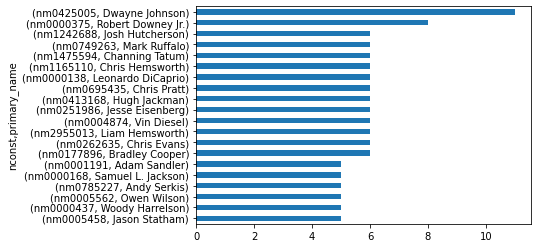

In [14]:
d9_counts = top_profit.query('category == "actor"')[['nconst', 'primary_name']].value_counts()
d9_counts.head(20)[::-1].plot.barh()

In [24]:
combos.sum().sort_values()

nm0000982    0.0
nm0264579    0.0
nm0126004    0.0
nm0046112    0.0
nm0193295    0.0
            ... 
nm0001497    0.0
nm0000138    0.0
nm0860947    0.0
nm2016091    0.0
nm6561765    0.0
Length: 1616, dtype: float64